# *Predictive Modeling for Client Subscription to Term Deposits*

## Project Description

The project aims to develop a predictive model to determine the likelihood of clients subscribing to a term deposit, based on historical and operational data. This will help the business optimize its marketing efforts and improve client engagement.

### Hypothesis

Null Hypothesis (H₀): Previous contact with the client during a marketing campaign does not affect their likelihood of subscribing to a term deposit.
    
Alternative Hypothesis (H₁): Previous contact with the client during a marketing campaign significantly affects their likelihood of subscribing to a term deposit.

### Questions 

- What are the key demographic and behavioral factors influencing a client's decision to subscribe to a term deposit?
- Are there any specific patterns or trends in the dataset (e.g., seasonal effects, age groups, job types) that affect the likelihood of subscription?
- How does the balance of a client’s account correlate with their likelihood of subscribing to a term deposit?
- Does the success or failure of previous marketing campaigns significantly influence the current subscription rates?
- Are certain communication channels (e.g., phone calls, emails) more effective in converting clients to subscribe to term deposits?
- What preprocessing techniques, such as handling missing data or feature scaling, are most critical for improving model performance?

### Installation 

In [1]:
pip install imbalaced-learn

Could not fetch URL https://pypi.org/simple/imbalaced-learn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/imbalaced-learn/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imbalaced-learn (from versions: none)
ERROR: No matching distribution found for imbalaced-learn


### Import Libraries 

In [49]:
import pandas as pd
import numpy as np 
from IPython.display import display
import re


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine Learning Libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier


#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### Loading Dataset 

In [3]:
# Loading the datasets 
bank_df=pd.read_csv("datahub/bank/bank-additional-full.csv",sep=';',quotechar='"')

# Eliminating rows containing Nan values
bank_df = bank_df[~bank_df.isna().any(axis=1)]


In [4]:
#displaying content of dataframe 
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Overview 

In [5]:
#Fetching the Attributes Names
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Generating Basic Information of the data
bank_df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

✍ summary:
- the Bank dataset has 21 feature with 41188 entries.

### Handling Missing Values 

In [8]:
#Computing the columns with the highest percentages of missing values
print("\n","Bank DataFrame: ")
display(bank_df.isna().sum(axis=0).sort_values(ascending = False)/ len(bank_df)*100)


 Bank DataFrame: 


age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

In [9]:
#Computing total number of missing values 
bank_df.isnull().sum().to_frame().rename(columns={0:"Total Number of Missing Values"})

,Total Number of Missing Values
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


📊 Inference:

- None of the columns is having missing values.
- So we don't have to perform Data Imputation.

### Checking For Duplicate Records 


In [10]:
duplicates_bank_df =bank_df[bank_df.duplicated()]
print("Duplicate Records")
print (duplicates_bank_df)

Duplicate Records
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retire

In [11]:
#Remove the duplicate records, Krreping onlt the first occurrence of each duplicate 
bank_df_cleaned =bank_df.drop_duplicates()


In [12]:
# Display the cleaned DataFrame 
print("Cleaned DataFrame:")
print(bank_df_cleaned)

Cleaned DataFrame:
       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_we

📊 Inference:

- The output indicates that there are 12 duplicate records in the bank_df DataFrame. Each row represents a duplicate entry with attributes like job, marital status, education, etc..
- Data leakage was resolved by dropping duplicated rows 

### Performing a descriptive statistical analysis on categorical columns

In [13]:
bank_df_cleaned.describe(include="object").T

,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


Interpretation:

- The most common job among the respondents is admin., followed by other job types.

- A majority of the respondents are married.

- The highest level of education for many respondents is a university degree.

- Most respondents do not have a history of defaulting on credit.

- ore respondents have housing loans than not.

- A large number of respondents do not have personal loans.

- The preferred method of contact is cellular.

- The majority of contacts were made in the month of May.

- Thursday is the most frequent day for contacting respondents.

- Most respondents had nonexistent outcomes from previous marketing campaigns.

- A significant number of respondents did not subscribe to the current campaign.

### Data Wrangling 

In [14]:
bank_df_cleaned.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19564,29,admin.,single,high.school,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
6129,31,admin.,married,high.school,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12918,32,services,divorced,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2344,53,technician,married,professional.course,unknown,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
3472,49,technician,married,university.degree,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [15]:
bank_df_cleaned.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
# Defining the columns to drop

#columns_to_drop=['contact', 'month', 'day_of_week', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_to_drop=['month', 'day_of_week', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Drop insignificant columns
bank_df_cleaned = bank_df_cleaned.drop(columns=columns_to_drop)

#Display the cleaned Dataframes 
print("Cleaned Dataframe with relevant columns: ")
print (bank_df_cleaned.head())

Cleaned Dataframe with relevant columns: 
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   duration  campaign     poutcome   y  
0       261         1  nonexistent  no  
1       149         1  nonexistent  no  
2       226         1  nonexistent  no  
3       151         1  nonexistent  no  
4       307         1  nonexistent  no  


📊 Inference:
  
- Contact, month, day_of_week, pday, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed columns represents a unique value for each client and may not be highly relevant for predicting the likelihood of a client subscribing to a term deposit

- So we can simply drop these features.

- Age,job, marital status,level of education,default, loan, campaign,poutcome, y columns are relevant because they reflect individual characteristics and past behaviors, which are more likely to influence the decision to subscribe to a term deposit.

## Exploratory Data Analysis 

In [17]:
# checking for skewness
print("Checking skewness in cleaned bank Dataset:")
display(bank_df_cleaned.skew(numeric_only=True).sort_values(ascending=False))


Checking skewness in cleaned bank Dataset:


campaign    4.762044
duration    3.262808
age         0.784560
dtype: float64

📗 Interpretation : 

    - The campaign column, which represents the number of contacts performed during the campaign, has a high positive skewness. This means that the data is heavily skewed to the right, with a long tail on the right side. This indicates that most clients were contacted only a few times, but there are some clients who were contacted many times.
    
    - The duration column, which represents the duration of the last contact in seconds, also has a high positive skewness. This means that the duration of the calls is mostly short, but there are some very long calls that create a long right tail.
    
    - The age column has a moderate positive skewness. This indicates that the distribution of ages is slightly skewed to the right, with most individuals being younger, but there are some older individuals that create a right tail.

### Data transformation to reduces skewness

In [18]:
#Apply log transformation to reduce skewness 

bank_df_cleaned['log_campaign']=np.log1p(bank_df_cleaned['campaign'])
bank_df_cleaned['log_duration']=np.log1p(bank_df_cleaned['duration'])
bank_df_cleaned['log_age'] = np.log1p(bank_df_cleaned['age'])

In [19]:
# Drop the original columns 
bank_df_cleaned = bank_df_cleaned.drop(columns=['campaign', 'duration','age'])

In [20]:
# Display the transformed DataFrame
print("Transformed DataFrame:")
print(bank_df_cleaned.head())

Transformed DataFrame:
         job  marital    education  default housing loan    contact  \
0  housemaid  married     basic.4y       no      no   no  telephone   
1   services  married  high.school  unknown      no   no  telephone   
2   services  married  high.school       no     yes   no  telephone   
3     admin.  married     basic.6y       no      no   no  telephone   
4   services  married  high.school       no      no  yes  telephone   

      poutcome   y  log_campaign  log_duration   log_age  
0  nonexistent  no      0.693147      5.568345  4.043051  
1  nonexistent  no      0.693147      5.010635  4.060443  
2  nonexistent  no      0.693147      5.424950  3.637586  
3  nonexistent  no      0.693147      5.023881  3.713572  
4  nonexistent  no      0.693147      5.730100  4.043051  


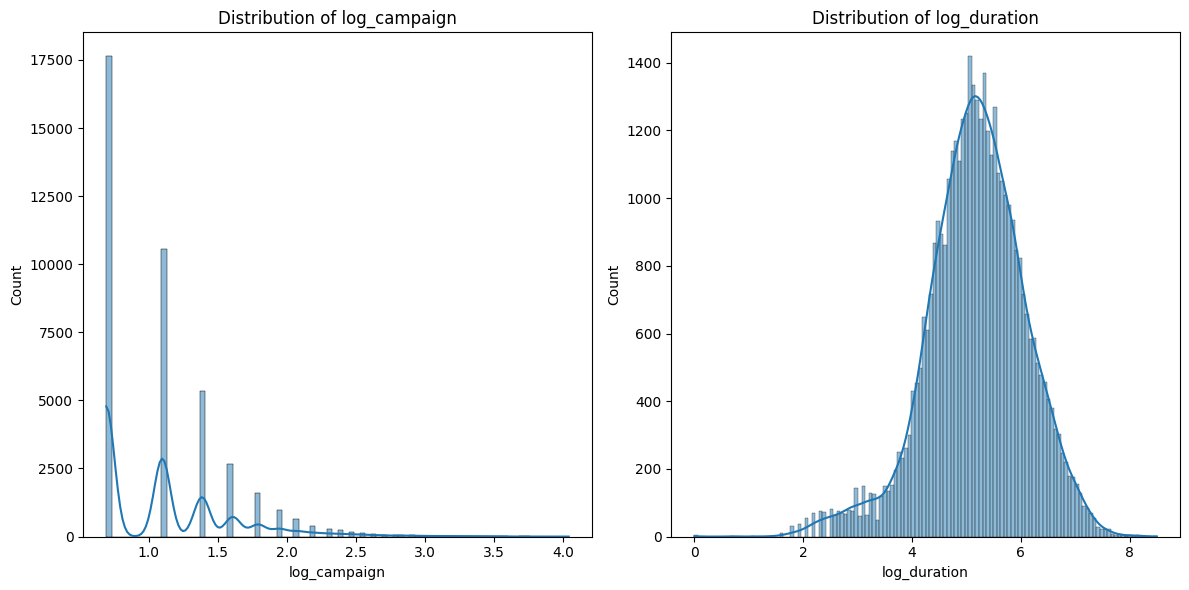

In [21]:
# Plotting the distribution of transformed features 

fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.histplot(bank_df_cleaned['log_campaign'], ax=axes[0],kde=True)
axes[0].set_title("Distribution of log_campaign")

sns.histplot(bank_df_cleaned['log_duration'], ax=axes[1], kde=True) 
axes[1].set_title('Distribution of log_duration')

#if 'log_age' in bank_df_cleaned.columns: 
   # sns.histplot(bank_df_cleaned['log_age'], ax=axes[3], kde=True) 
   # axes[2].set_title('Distribution of log_age')

#sns.histplot(bank_df_cleaned['log_age'], ax=axes[2], kde=True) 
#axes[2].set_title('Distribution of log_age')

plt.tight_layout()
plt.show()


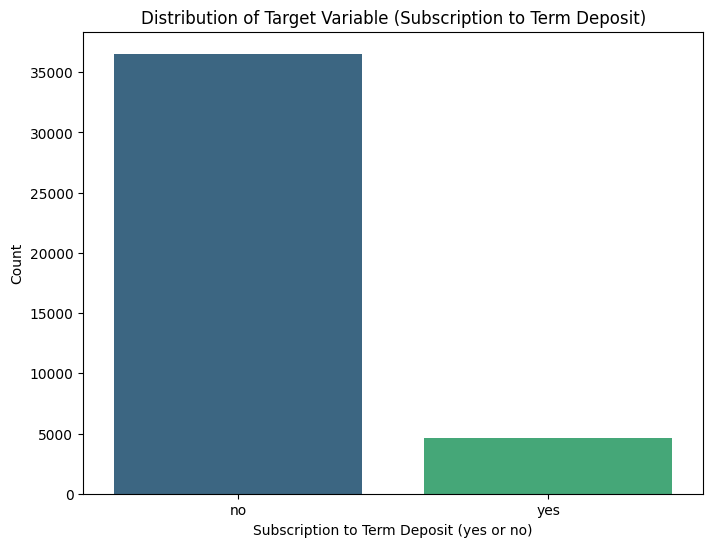

In [22]:
# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(8, 6)) 
sns.countplot(data=bank_df_cleaned, x='y', palette='viridis') 
plt.title('Distribution of Target Variable (Subscription to Term Deposit)') 
plt.xlabel('Subscription to Term Deposit (yes or no)') 
plt.ylabel('Count') 
plt.show()

### Checking for Outliers 

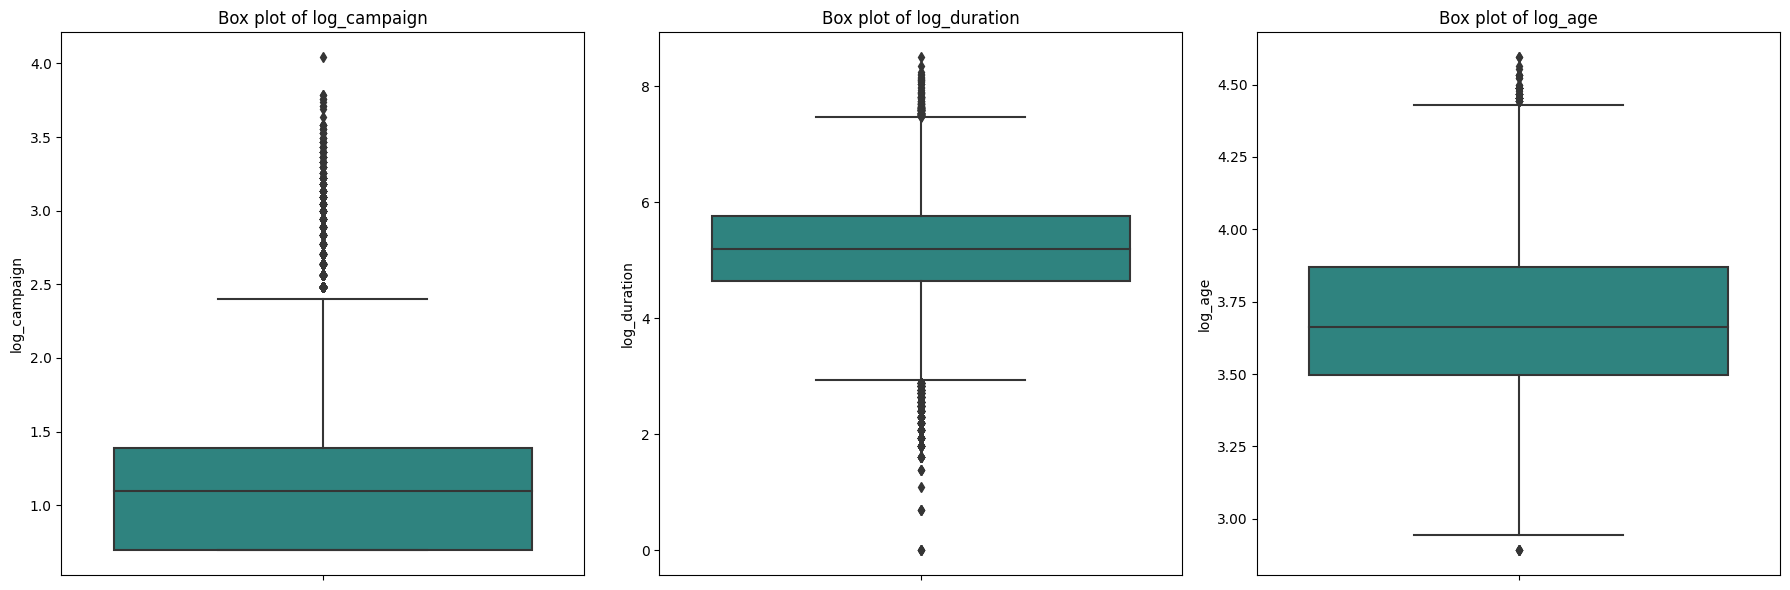

In [23]:
#Check outlier from the numeric columns 

numeric_columns =['log_campaign','log_duration','log_age']

# Plotting box plots for each numeric column to check for outliers
plt.figure(figsize=(18,6))
 
for i, col in enumerate(numeric_columns,1):
    plt.subplot(1,len(numeric_columns),i)
    sns.boxplot(data=bank_df_cleaned,y=col,palette='viridis')
    plt.title(f'Box plot of {col}')
                  
plt.tight_layout()
plt.show()              



💷 Summary:
    
- Outliers Detection: The presence of outliers in all three plots, particularly in log_campaign and log_duration, indicates variability in these features. While log_age shows fewer outliers, suggesting a more consistent distribution.
    
- Box Plot of log_age:A few outliers are visible above the upper whisker, suggesting some clients ages are significantly higher than the majority.
    
- Box Plot of log_duration: There are several outliers above the upper whisker, indicating some contacts had significantly longer durations than most. 
    
- Box Plot of log_campaign: Points outside the whiskers are considered outliers, and several such points are visible above the upper whisker, indicating some clients were contacted significantly more times than the majority.  

### Bivariate Analysis 

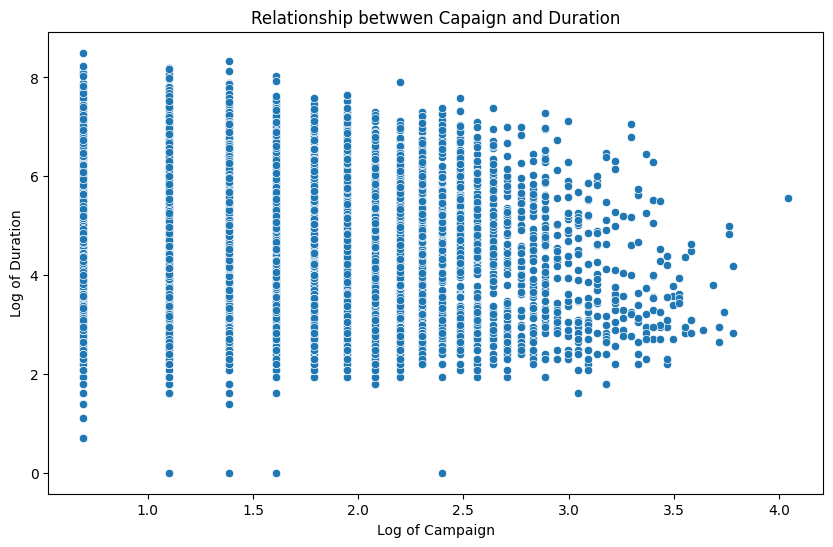

In [24]:
# scatter plot: Relationship between log_campaign and log_duration 

plt.figure(figsize=(10,6))
sns.scatterplot(data=bank_df_cleaned,x='log_campaign',y='log_duration')
plt.title('Relationship betwwen Capaign and Duration')
plt.xlabel('Log of Campaign')
plt.ylabel('Log of Duration')
plt.show()

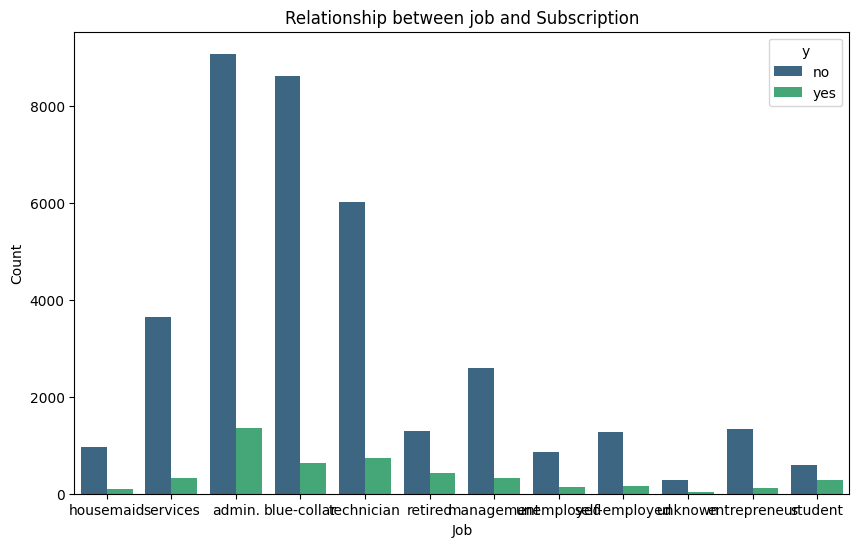

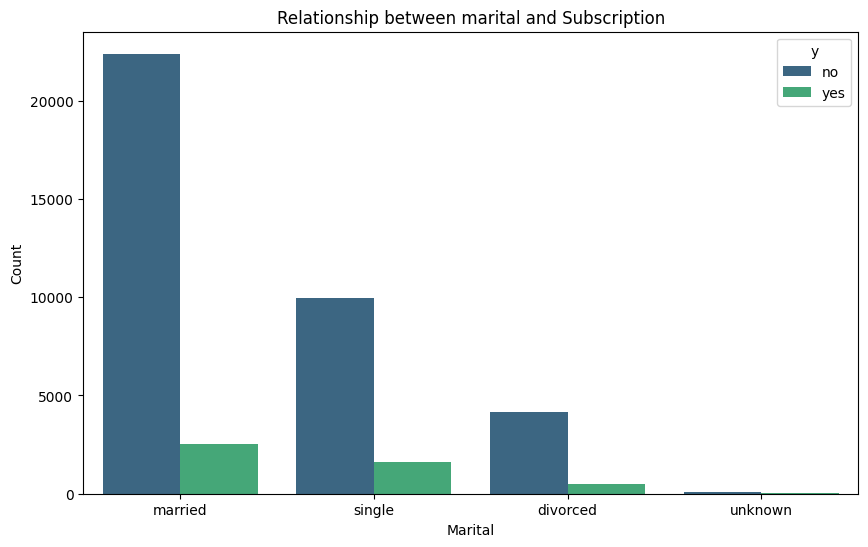

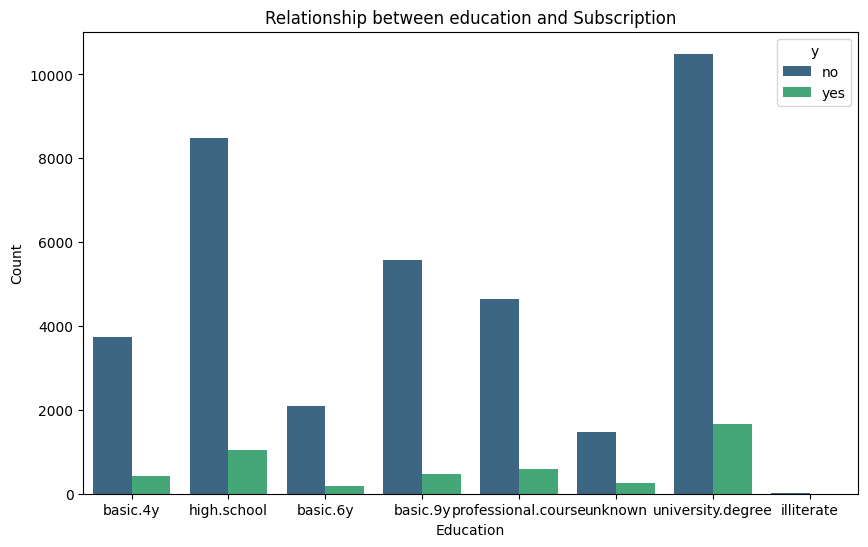

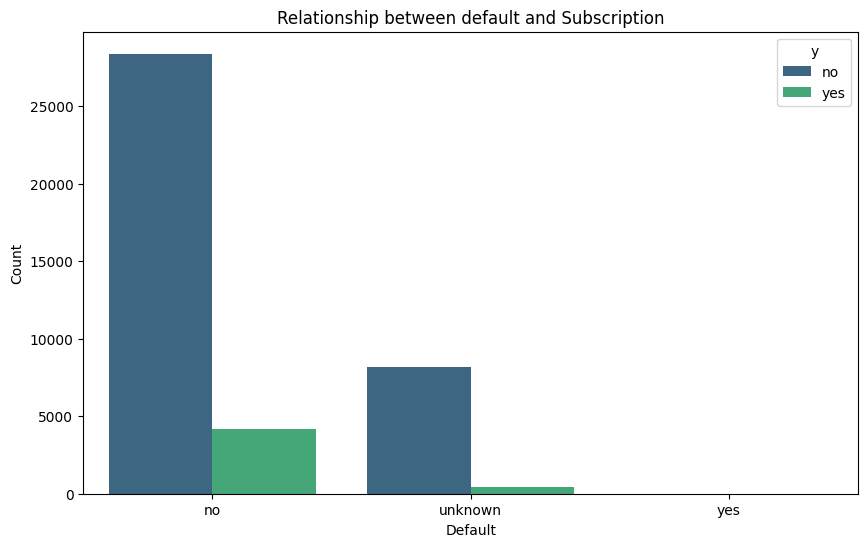

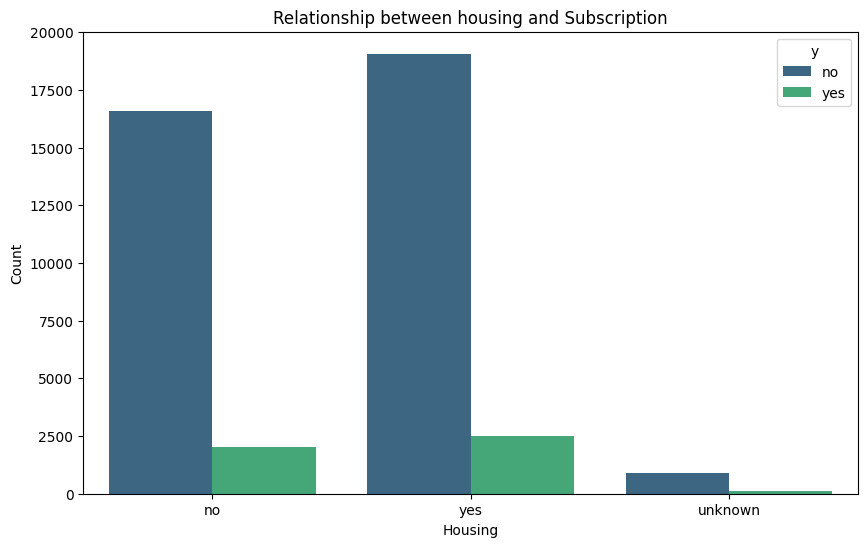

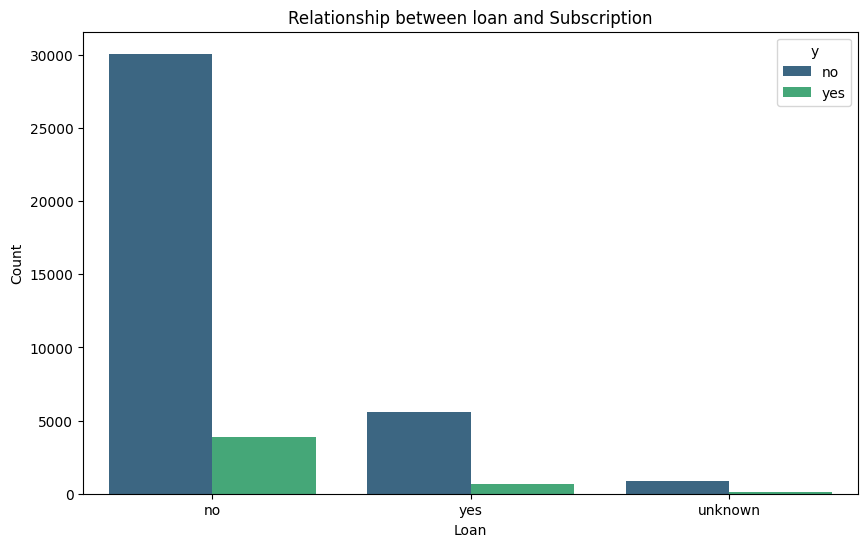

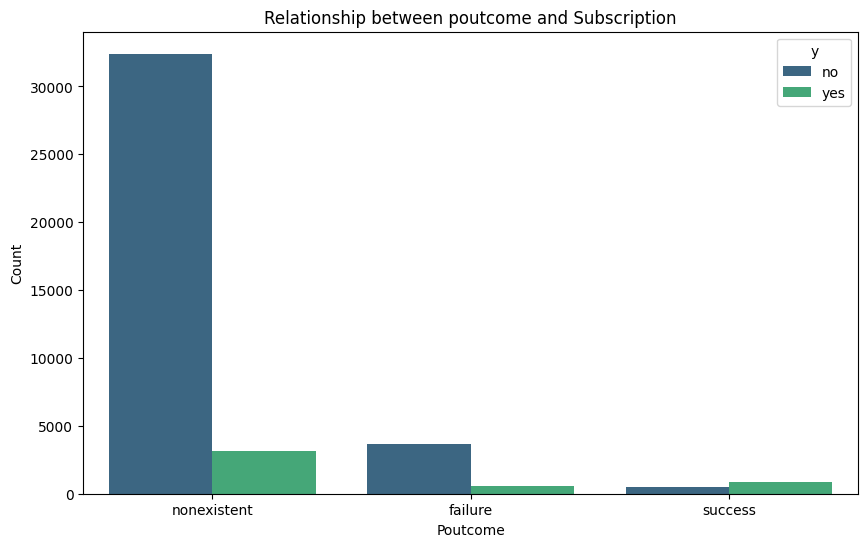

In [25]:
# Bar plot: Relationship between categorical variables and the target variable 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'] 
for col in categorical_columns: 
    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=bank_df_cleaned, x=col, hue='y', palette='viridis') 
    plt.title(f'Relationship between {col} and Subscription') 
    plt.xlabel(col.capitalize()) 
    plt.ylabel('Count') 
    plt.show()

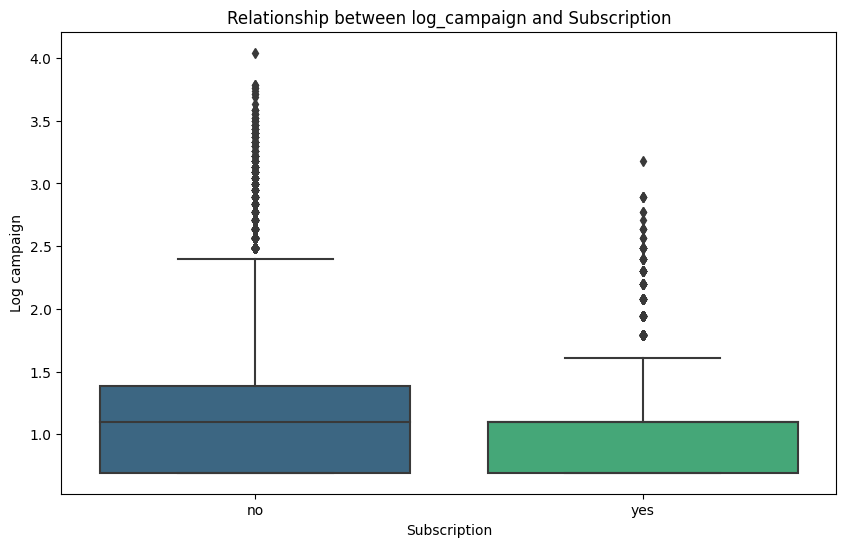

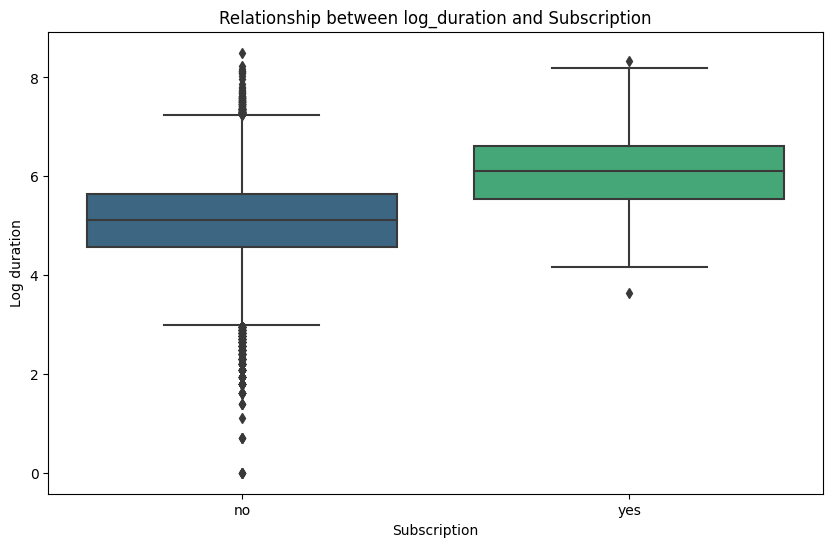

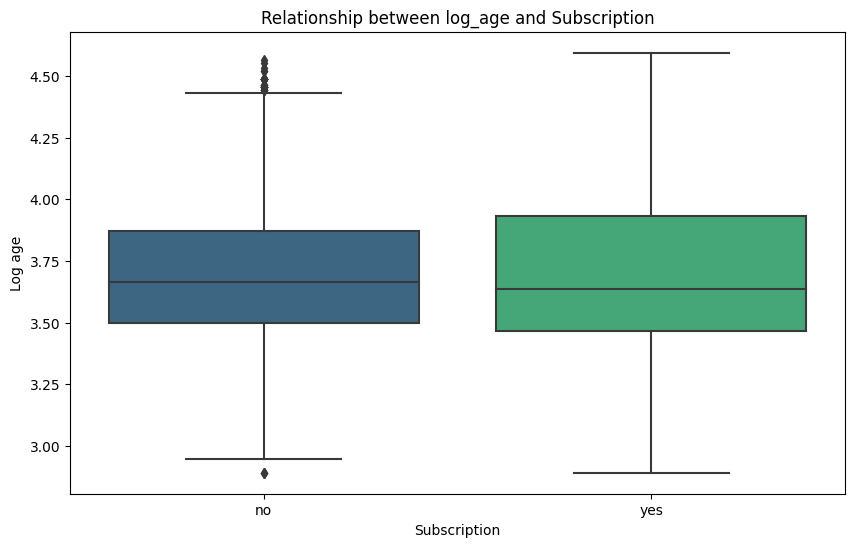

In [26]:
# Box plot: Relationship between numerical variables and the target variable 
numerical_columns = ['log_campaign', 'log_duration', 'log_age'] 
for col in numerical_columns: 
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=bank_df_cleaned, x='y', y=col, palette='viridis') 
    plt.title(f'Relationship between {col} and Subscription') 
    plt.xlabel('Subscription') 
    plt.ylabel(col.capitalize().replace('_', ' ')) 
    plt.show()

### 🔍Key Observations  :

1. Subscription Status: No:

- Median: The median log_campaign value is around 1.1.

- Interquartile Range (IQR): The IQR extends from approximately 1.0 to 1.5.

- Outliers: There are numerous outliers, with values extending up to around 4.0, indicating that some clients who were   contacted many times did not subscribe.

2. Subscription Status: Yes:

+ Median: The median log_campaign value is slightly lower, around 1.0.

+ Interquartile Range (IQR): The IQR extends from approximately 1.0 to 1.3.

+ Outliers: There are fewer outliers compared to the no category, with the highest outlier around 2.5. This suggests fewer extreme campaign efforts were needed for clients who eventually subscribed.


### Multivariate Analysis 

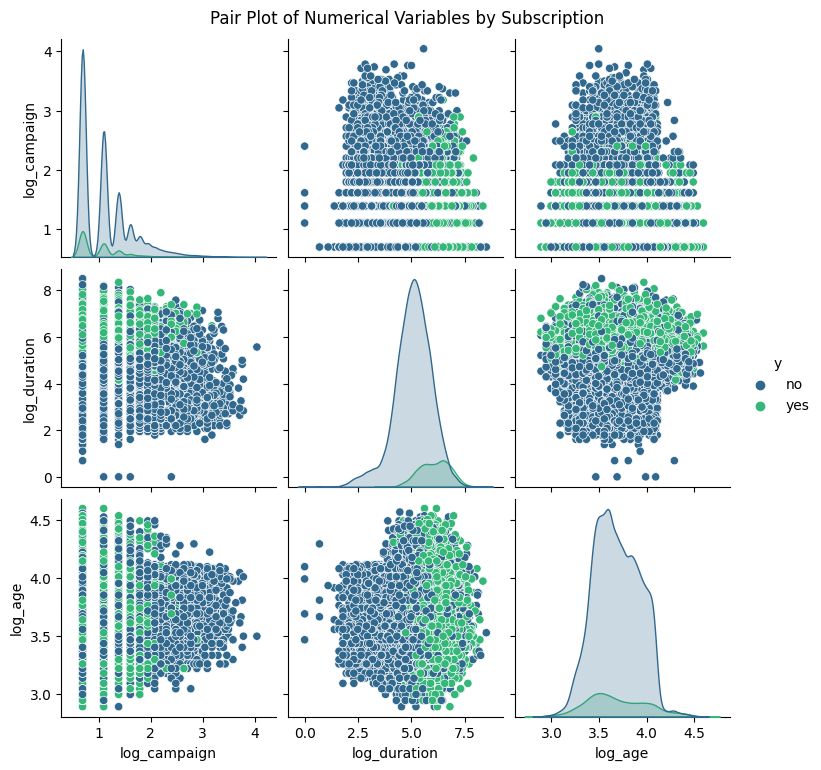

In [27]:

# Select relevant numerical columns for multivariate analysis
numerical_columns = ['log_campaign', 'log_duration', 'log_age']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Pair plot: Visualize relationships between numerical variables and the target variable 'y'
sns.pairplot(bank_df_cleaned, hue='y', vars=numerical_columns, palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables by Subscription', y=1.02)
plt.show()



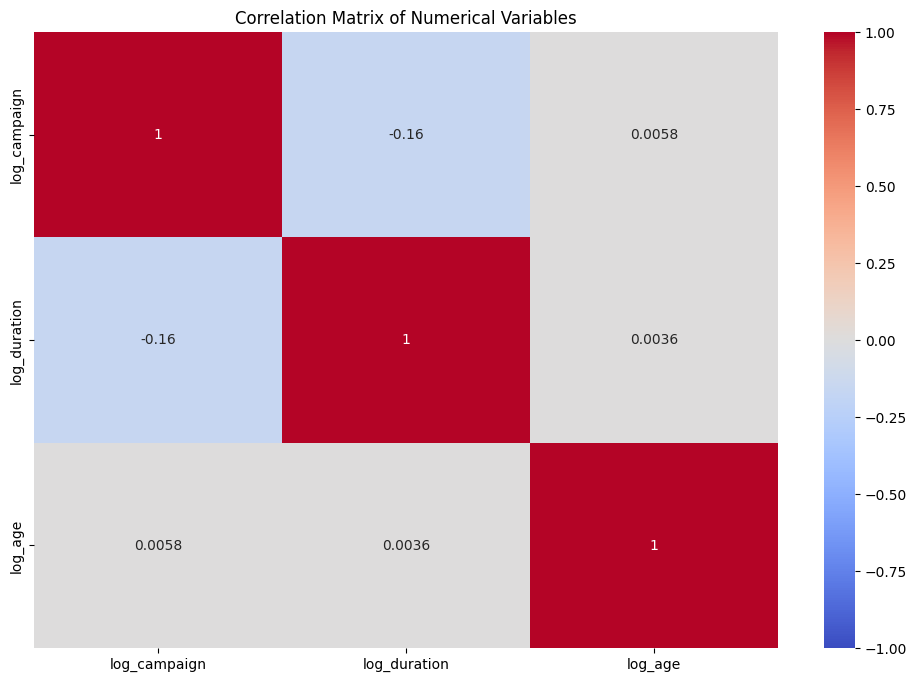

In [28]:
# Heatmap: Correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = bank_df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

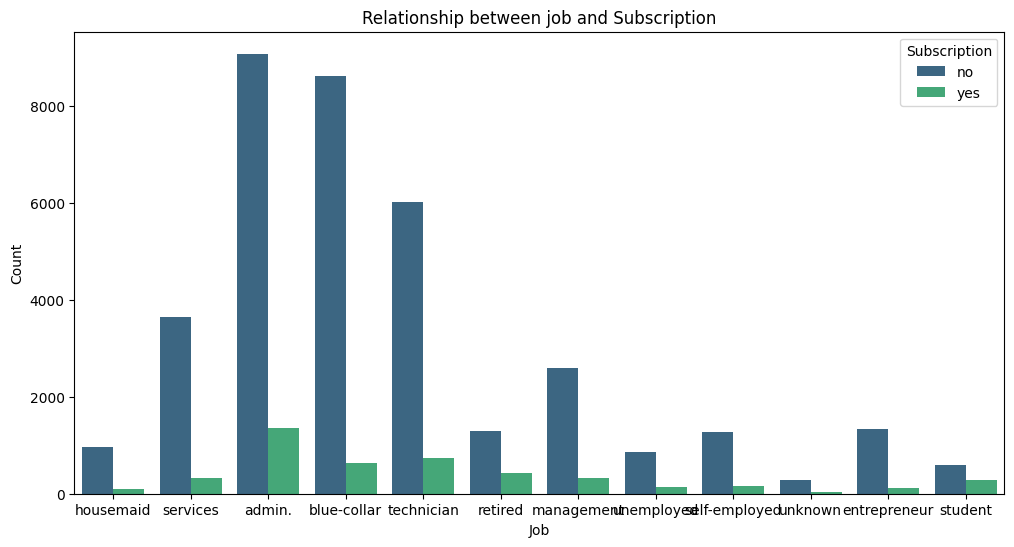

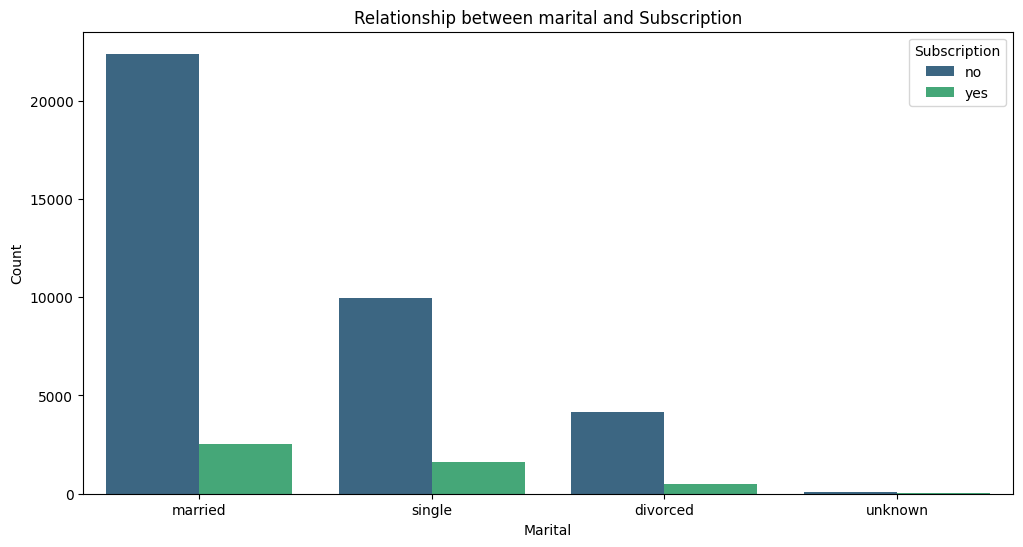

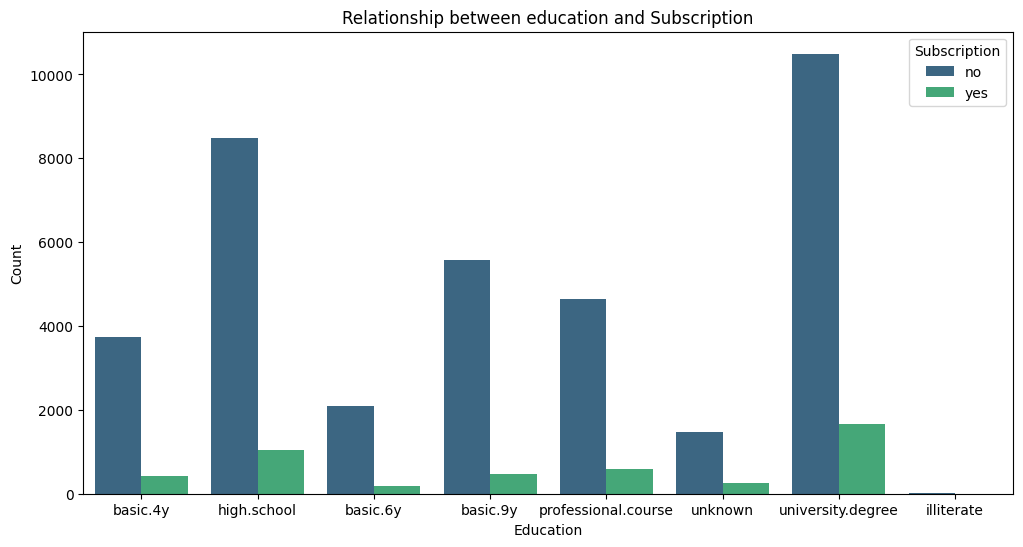

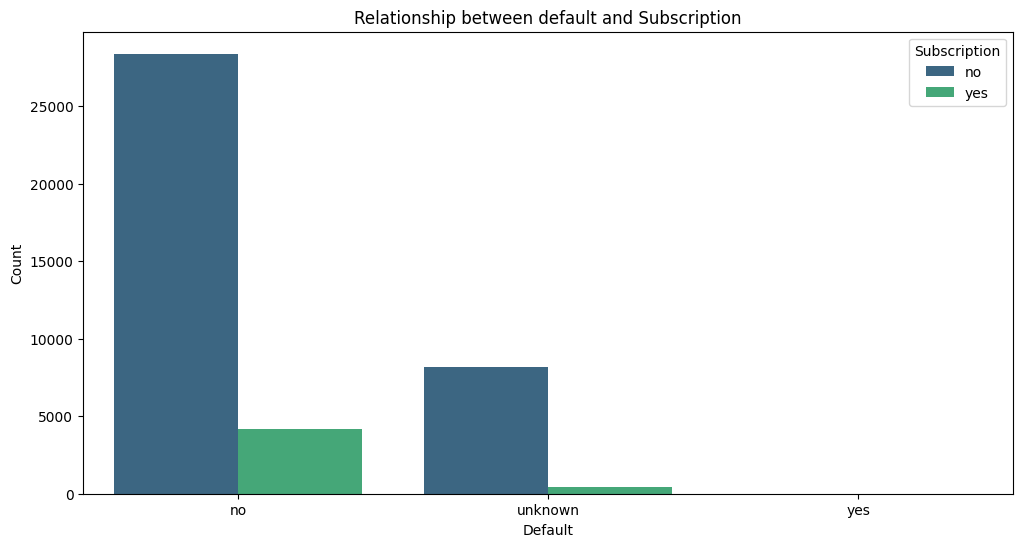

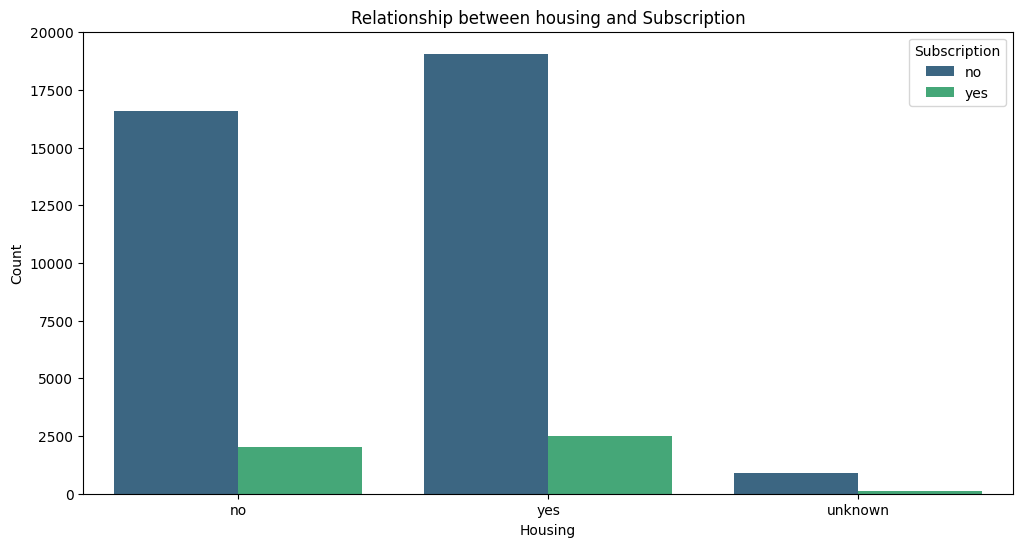

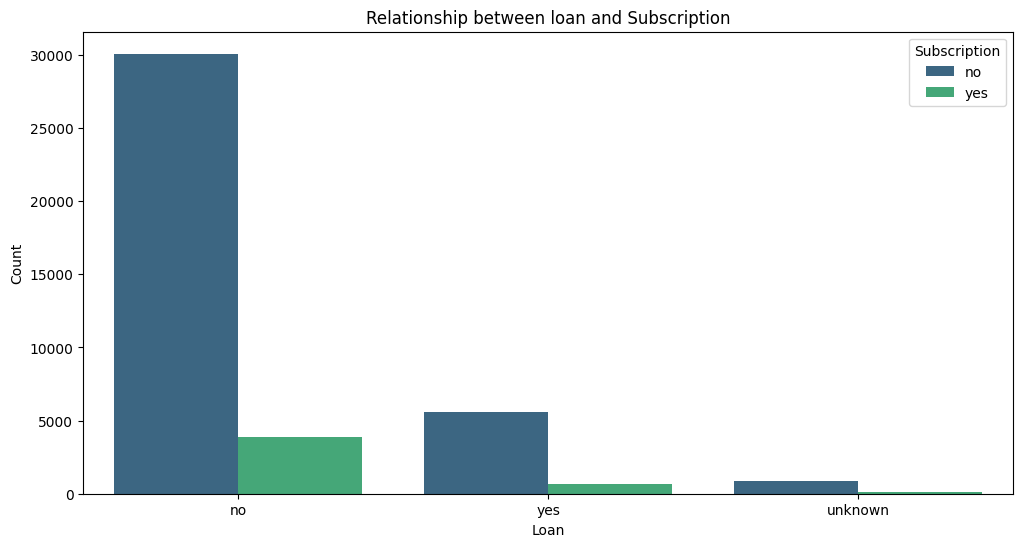

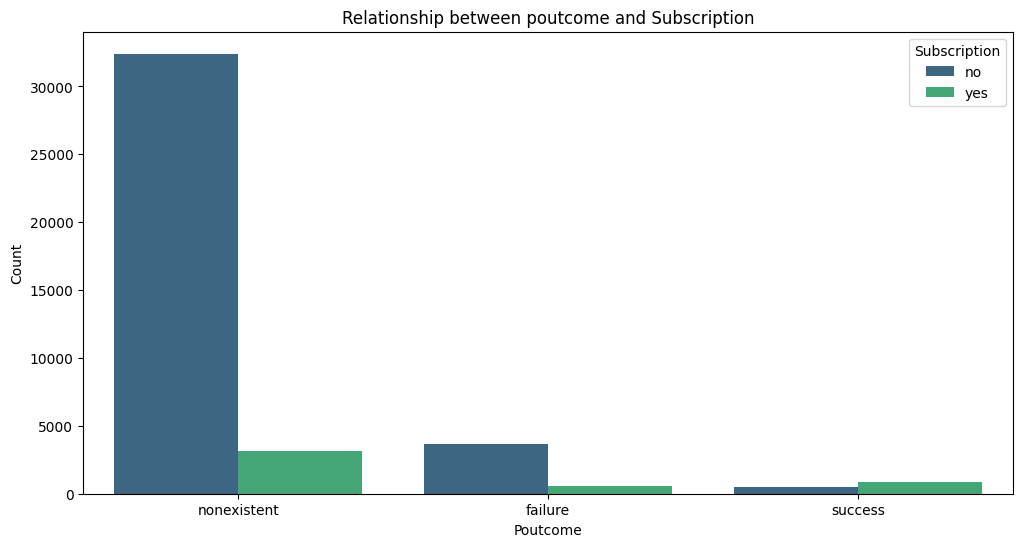

In [29]:
### Grouped Bar plot : Visualize relationships between categorical variables and the target variable 'y'


for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=bank_df_cleaned, x=col, hue='y', palette='viridis')
    plt.title(f'Relationship between {col} and Subscription')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Subscription')
    plt.show()


### Feature Processing & Engineering 

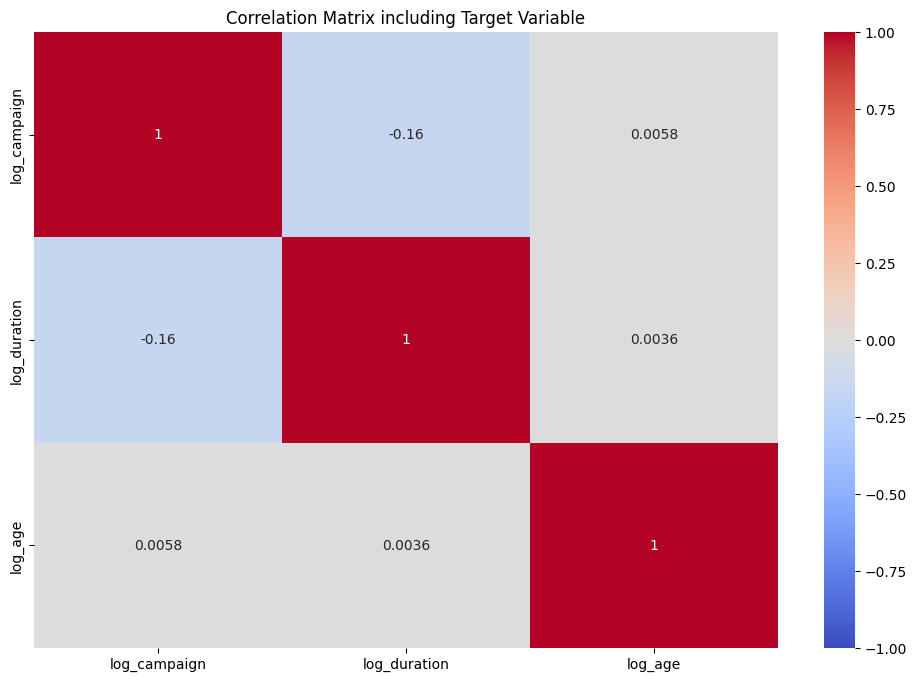

In [30]:
# Calculate the correlation matrix including the target variable 'y'
correlation_matrix = bank_df_cleaned.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix including Target Variable')
plt.show()

### Creating new features 

In [31]:
#Create interacting feature 
bank_df_cleaned['campaign_duration_interaction']= bank_df_cleaned['log_campaign']* bank_df_cleaned['log_duration']

In [32]:
# Display the new DataFrame with interation feature 
print(bank_df_cleaned[['log_campaign','log_duration','campaign_duration_interaction']].head())


   log_campaign  log_duration  campaign_duration_interaction
0      0.693147      5.568345                       3.859682
1      0.693147      5.010635                       3.473108
2      0.693147      5.424950                       3.760289
3      0.693147      5.023881                       3.482289
4      0.693147      5.730100                       3.971803


In [33]:
# Binary feature: contact_is_cellular
bank_df_cleaned['contact_is_cellular'] = bank_df_cleaned['contact'].apply(lambda x: 1 if x == 'cellular' else 0)

# Display the new DataFrame with binary feature
print(bank_df_cleaned[['contact', 'contact_is_cellular']].head())

     contact  contact_is_cellular
0  telephone                    0
1  telephone                    0
2  telephone                    0
3  telephone                    0
4  telephone                    0


In [34]:
# Aggregated feature: total_loans
bank_df_cleaned['total_loans'] = bank_df_cleaned.apply(lambda row: int(row['housing'] == 'yes') + int(row['loan'] == 'yes'), axis=1)

# Display the new DataFrame with aggregated feature
print(bank_df_cleaned[['housing', 'loan', 'total_loans']].head())


  housing loan  total_loans
0      no   no            0
1      no   no            0
2     yes   no            1
3      no   no            0
4      no  yes            1


In [35]:
bank_df_cleaned['contact']

0        telephone
1        telephone
2        telephone
3        telephone
4        telephone
           ...    
41183     cellular
41184     cellular
41185     cellular
41186     cellular
41187     cellular
Name: contact, Length: 41176, dtype: object

In [36]:
bank_df_cleaned

,job,marital,education,default,housing,loan,contact,poutcome,y,log_campaign,log_duration,log_age,campaign_duration_interaction,contact_is_cellular,total_loans
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no,0.693147,5.568345,4.043051,3.859682,0,0
1,services,married,high.school,unknown,no,no,telephone,nonexistent,no,0.693147,5.010635,4.060443,3.473108,0,0
2,services,married,high.school,no,yes,no,telephone,nonexistent,no,0.693147,5.424950,3.637586,3.760289,0,1
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no,0.693147,5.023881,3.713572,3.482289,0,0
4,services,married,high.school,no,no,yes,telephone,nonexistent,no,0.693147,5.730100,4.043051,3.971803,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nonexistent,yes,0.693147,5.814131,4.304065,4.030048,1,1
41184,blue-collar,married,professional.course,no,no,no,cellular,nonexistent,no,0.693147,5.950643,3.850148,4.124671,1,0
41185,retired,married,university.degree,no,yes,no,cellular,nonexistent,no,1.098612,5.247024,4.043051,5.764445,1,1
41186,technician,married,professional.course,no,no,no,cellular,nonexistent,yes,0.693147,6.093570,3.806662,4.223741,1,0


In [37]:
# Drop the contact column 
bank_df_cleaned = bank_df_cleaned.drop(columns=['contact'])

In [38]:
bank_df_cleaned

,job,marital,education,default,housing,loan,poutcome,y,log_campaign,log_duration,log_age,campaign_duration_interaction,contact_is_cellular,total_loans
0,housemaid,married,basic.4y,no,no,no,nonexistent,no,0.693147,5.568345,4.043051,3.859682,0,0
1,services,married,high.school,unknown,no,no,nonexistent,no,0.693147,5.010635,4.060443,3.473108,0,0
2,services,married,high.school,no,yes,no,nonexistent,no,0.693147,5.424950,3.637586,3.760289,0,1
3,admin.,married,basic.6y,no,no,no,nonexistent,no,0.693147,5.023881,3.713572,3.482289,0,0
4,services,married,high.school,no,no,yes,nonexistent,no,0.693147,5.730100,4.043051,3.971803,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,nonexistent,yes,0.693147,5.814131,4.304065,4.030048,1,1
41184,blue-collar,married,professional.course,no,no,no,nonexistent,no,0.693147,5.950643,3.850148,4.124671,1,0
41185,retired,married,university.degree,no,yes,no,nonexistent,no,1.098612,5.247024,4.043051,5.764445,1,1
41186,technician,married,professional.course,no,no,no,nonexistent,yes,0.693147,6.093570,3.806662,4.223741,1,0


### Build a Predictive Model 

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [40]:

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoded_features = encoder.fit_transform(bank_df_cleaned[categorical_columns])


In [41]:
# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the encoded features
bank_df_cleaned = bank_df_cleaned.drop(columns=categorical_columns)
bank_df_cleaned = pd.concat([bank_df_cleaned, encoded_df], axis=1)



In [42]:
# Encode the target variable 'y'
label_encoder = LabelEncoder()
bank_df_cleaned['y'] = label_encoder.fit_transform(bank_df_cleaned['y'])

# Separate features and target variable
X = bank_df_cleaned.drop(columns=['y'])
y = bank_df_cleaned['y']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Dictionary to store models and their names
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'HistGradient Boosting': HistGradientBoostingClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

In [45]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Get the unique classes present in y_test
    unique_classes = np.unique(y_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform(unique_classes))
    confusion = confusion_matrix(y_test, y_pred)
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': confusion
    }

Random Forest Model
Accuracy: 0.8964554503520272
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7311
         yes       0.57      0.32      0.41       927

    accuracy                           0.90      8238
   macro avg       0.75      0.64      0.68      8238
weighted avg       0.88      0.90      0.88      8238


------------------------------------------------------------



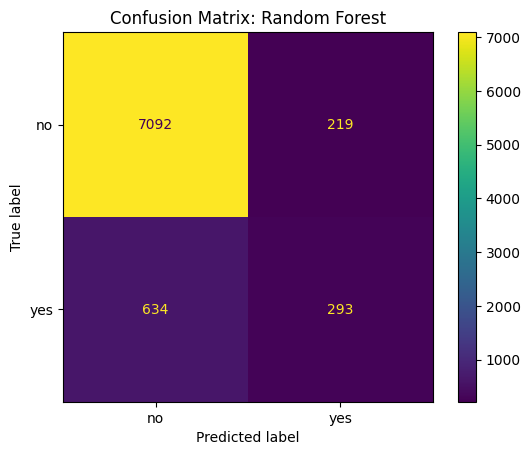

Logistic Regression Model
Accuracy: 0.9004612770089827
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7311
         yes       0.64      0.27      0.38       927

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238


------------------------------------------------------------



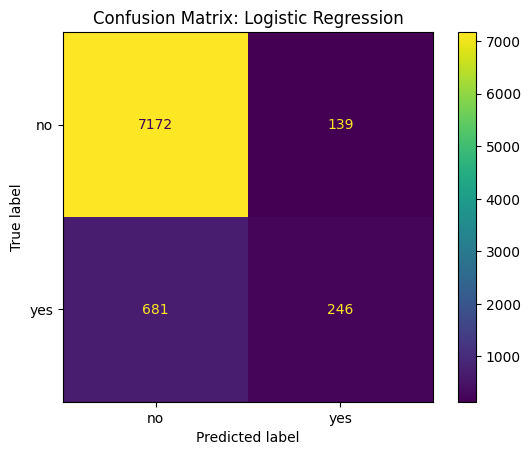

Gradient Boosting Model
Accuracy: 0.9015537751881525
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7311
         yes       0.61      0.35      0.44       927

    accuracy                           0.90      8238
   macro avg       0.77      0.66      0.69      8238
weighted avg       0.89      0.90      0.89      8238


------------------------------------------------------------



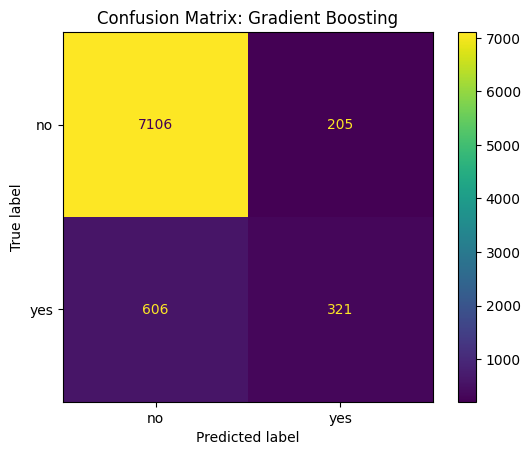

HistGradient Boosting Model
Accuracy: 0.9016751638747269
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7311
         yes       0.61      0.35      0.44       927

    accuracy                           0.90      8238
   macro avg       0.77      0.66      0.69      8238
weighted avg       0.89      0.90      0.89      8238


------------------------------------------------------------



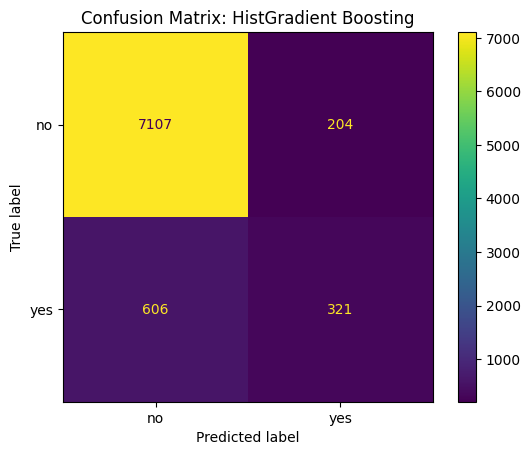

In [46]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} Model")
    print("Accuracy:", metrics['accuracy'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n" + "-"*60 + "\n")

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=metrics['confusion_matrix'], display_labels=label_encoder.inverse_transform(np.unique(y_test)))
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

### 🔍Model Selection :

+ Based on the results provided for the four models, the HistGradient Boosting Model and Gradient Boosting Model seem to perform the best overall. Both models have an accuracy of around 0.9017 and provide similar results in their classification reports.

HistGradient Boosting Model:
- Accuracy: 0.9016751638747269

- Precision (Yes): 0.61

-Recall (Yes): 0.35

- F1-Score (Yes): 0.44

Gradient Boosting Model:
- Accuracy: 0.9015537751881525

- Precision (Yes): 0.61

- Recall (Yes): 0.35

- F1-Score (Yes): 0.44
    
+ Both models have the same precision, recall, and f1-score for the positive class (yes). However, the HistGradient Boosting Model edges out slightly in terms of accuracy.   

### Hyperparameter Tuning for HistGradientBoostingClassifier

In [50]:
# Define the parameter grid for HistGradientBoostingClassifier
param_grid_hgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [31, 50, 100],
    'min_samples_leaf': [20, 50, 100]
}

# Instantiate the GridSearchCV object
grid_search_hgb = GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=42),
                               param_grid=param_grid_hgb,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# Perform the grid search
grid_search_hgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_hgb = grid_search_hgb.best_params_
best_score_hgb = grid_search_hgb.best_score_

print("Best parameters for HistGradientBoostingClassifier:", best_params_hgb)
print("Best cross-validation score for HistGradientBoostingClassifier:", best_score_hgb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for HistGradientBoostingClassifier: {'learning_rate': 0.01, 'max_iter': 200, 'max_leaf_nodes': 31, 'min_samples_leaf': 50}
Best cross-validation score for HistGradientBoostingClassifier: 0.9019423368740516


In [ ]:
#Display  data from bank_df_cleaned
bank_df_cleaned

In [ ]:
#Handle Nan Values 

bank_df_cleaned.dropna(inplace=True)

In [ ]:
bank_df_cleaned.shape

#### Summary🔖; 

- Rows were reduced by 3024 after handling the NaN values 

### Data Preparation